Looking at the reprocessed light curves

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import os
import glob
from astropy.table import Table
from astropy.io import ascii
import astropy.units as u
import astropy.constants as const
from scipy.interpolate import interpolate
from astropy.convolution import convolve, Box1DKernel
from astropy.modeling import models, fitting
import lightkurve as lk

#matplotlib set up
%matplotlib inline
from matplotlib import rcParams
rcParams["figure.figsize"] = (14, 5)
rcParams["font.size"] = 20


First observation that was reprocessed, checking on 20201109

In [2]:
path = '/media/david/5tb_storage1/gd394_chandra/21181/working/'
tbin = 100
fname = 'ob21181_{}slc.fits'.format(tbin)

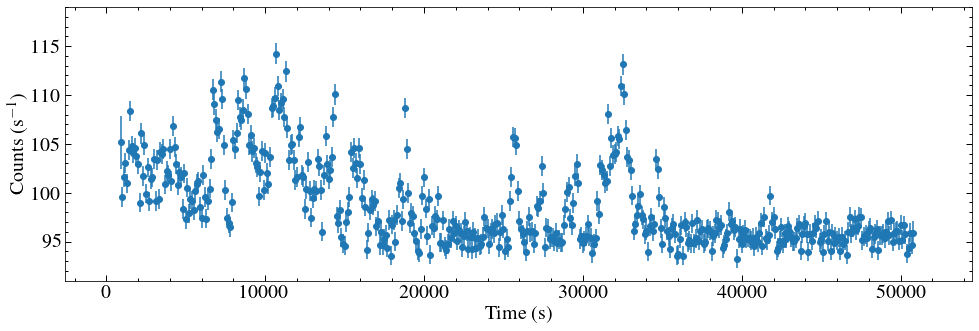

In [23]:
lcpath = path+fname 
data = fits.getdata(lcpath, 1)
t, c, e = data['TIME'], data['COUNT_RATE'], data['COUNT_RATE_ERR']
plt.errorbar(t-t[0], c, yerr=e, marker='o', ls='none')
plt.ylim(91, 119)
#plt.show()
#plt.plot(t, data['EXPOSURE'])
plt.ylabel('Counts (s$^{-1}$)')
plt.xlabel('Time (s)')
plt.tight_layout()
plt.savefig('plots/ob21181_{}slc.pdf'.format(tbin))

In [7]:
data.names

['TIME_BIN',
 'TIME_MIN',
 'TIME',
 'TIME_MAX',
 'COUNTS',
 'STAT_ERR',
 'AREA',
 'EXPOSURE',
 'COUNT_RATE',
 'COUNT_RATE_ERR']

In [9]:
fits.getheader(lcpath,1)

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / 8-bit bytes                                    
NAXIS   =                    2 / 2-dimensional binary table                     
NAXIS1  =                   72 / width of table in bytes                        
NAXIS2  =                  520 / number of rows in table                        
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group (required keyword)              
TFIELDS =                   10 / number of fields in each row                   
EXTNAME = 'LIGHTCURVE'         / name of this binary table extension            
HDUNAME = 'LIGHTCURVE'         / ASCDM block name                               
ORIGIN  = 'ASC     '           / Source of FITS file                            
CREATOR = 'dmextract - Version CIAO 4.12' / tool that c                         
ASCDSVER= 'CIAO 4.12'       